# K-Nearest Neighbors Algorithm (Classification)

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

*Note:* `1 - women, 2 - men`

In [2]:
data = pd.read_csv('./data/cardio.csv', delimiter=';')
data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
train, test = train_test_split(data, test_size=0.2)

train_x = train[['height', 'weight']]
train_y = train['gender']

train_x.head(5)

,height,weight
62987,169,70.0
48551,157,58.0
56126,164,62.0
60119,151,63.0
36338,179,74.0


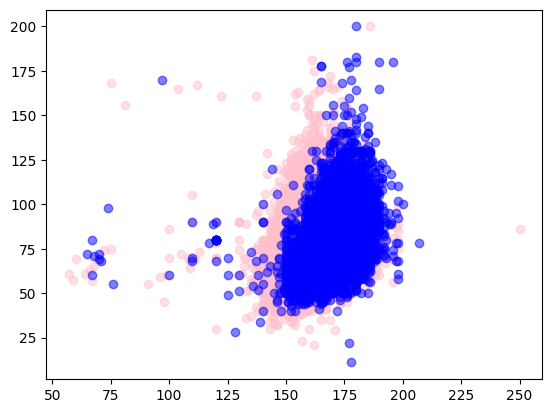

In [8]:
female = train[train['gender'] == 1]
male = train[train['gender'] == 2]

plt.scatter(female['height'], female['weight'], color='pink', alpha=0.5)
plt.scatter(male['height'], male['weight'], color='blue', alpha=0.5)

In [9]:
k = 10

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_x.values, train_y.values)

KNeighborsClassifier(n_neighbors=10)

In [11]:
def test_male(h, w):
  assert(knn.predict([[h, w]]) == 2)

def test_female(h, w):
  assert(knn.predict([[h, w]]) == 1)

test_male(195, 100)
test_male(178, 62)
test_male(178, 75)
test_male(171, 80)
test_male(172, 62)

test_female(160, 55)
test_female(150, 53)
test_female(158, 80)
test_female(164, 54)
test_female(163, 57)

In [12]:
from sklearn.metrics import confusion_matrix, f1_score

In [13]:
label_correct = np.array(test['gender'])
label_predicted = [knn.predict([[row['height'], row['weight']]]) for _, row in test.iterrows()]

print(confusion_matrix(label_correct, label_predicted))
print(f1_score(label_correct, label_predicted))

[[8037 1058]
 [2338 2567]]
0.8255778120184899
